In [80]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import RobustScaler, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.inspection import permutation_importance

import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso,  BayesianRidge, LassoLarsIC

from scipy import stats
from scipy.stats import norm, skew

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%load_ext autotime


The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 10.6 ms (started: 2022-08-09 01:15:06 +03:00)


In [2]:
train = pd.read_csv('./house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('./house-prices-advanced-regression-techniques/test.csv')

time: 30.8 ms (started: 2022-08-09 01:09:08 +03:00)


In [3]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


time: 32 ms (started: 2022-08-09 01:09:08 +03:00)


In [4]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


time: 17.7 ms (started: 2022-08-09 01:09:08 +03:00)


In [5]:
train_ID = train['Id']
test_ID = test['Id']

train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

print(train.shape) 
print(test.shape)

(1460, 80)
(1459, 79)
time: 20.4 ms (started: 2022-08-09 01:09:08 +03:00)


# EDA

In [6]:
train.columns.tolist()

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

time: 3.89 ms (started: 2022-08-09 01:09:09 +03:00)


In [7]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

time: 11 ms (started: 2022-08-09 01:09:09 +03:00)


<AxesSubplot:>

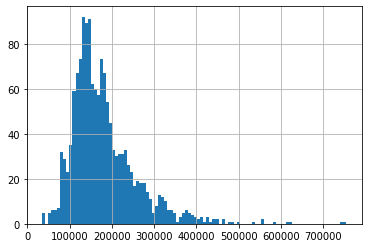

time: 312 ms (started: 2022-08-09 01:09:09 +03:00)


In [8]:
train['SalePrice'].hist(bins=100)

/home/roman/my_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


mu = 180921.19589041095, sigma = 79415.29188606751


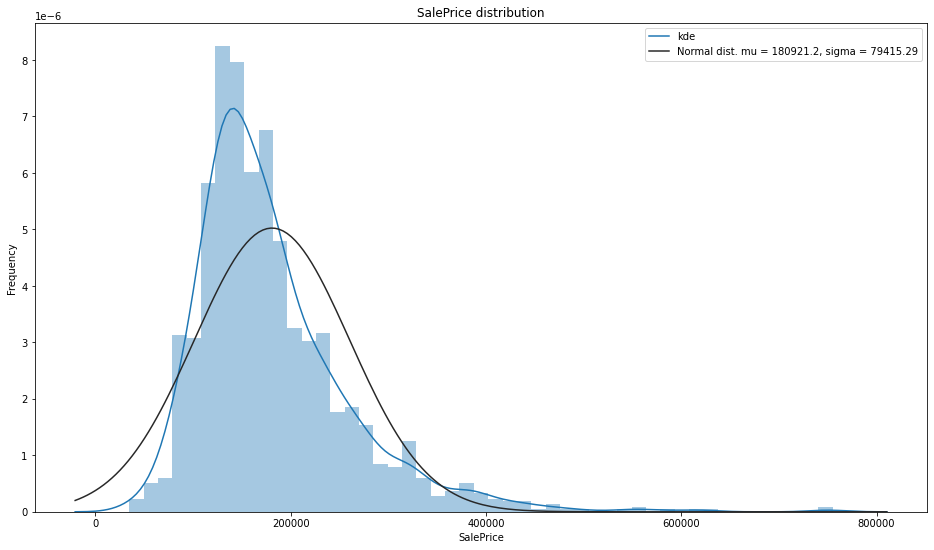

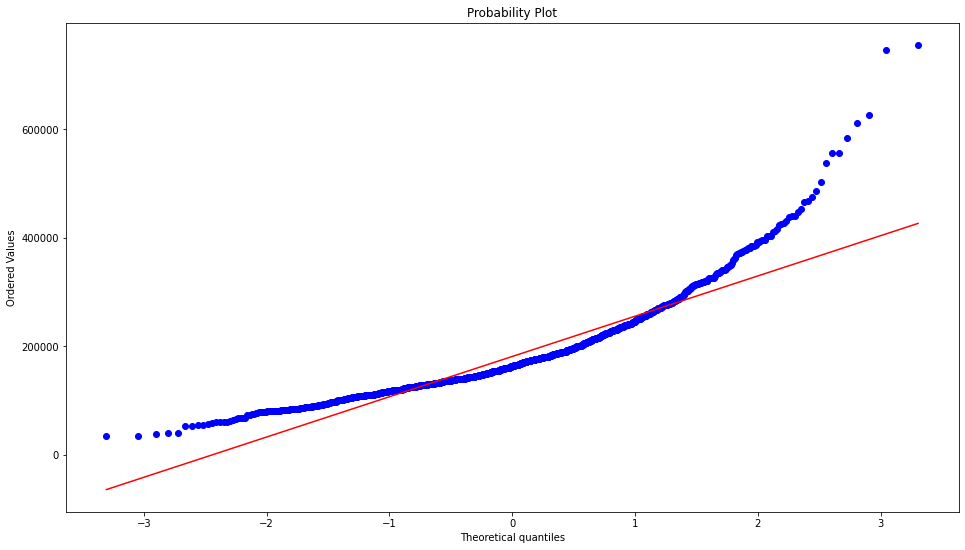

time: 612 ms (started: 2022-08-09 01:09:09 +03:00)


In [9]:
# plot the distribution
plt.figure(figsize=(16,9))
sns.distplot(train['SalePrice'] , fit=norm, kde=True);

# Get the fitted parameters

(mu, sigma) = norm.fit(train['SalePrice'])
print(f'mu = {mu}, sigma = {sigma}')

plt.legend(['kde', f'Normal dist. mu = {round(mu, 2)}, sigma = {round(sigma, 2)}'],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

# plot the QQ-plot
fig = plt.figure(figsize=(16,9))
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

### Metric
Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.) (https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview/evaluation)



In [10]:
train['SalePrice'] = np.log1p(train["SalePrice"])

time: 1.47 ms (started: 2022-08-09 01:09:10 +03:00)


mu = 12.024057394918406, sigma = 0.39931245219387496


/home/roman/my_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


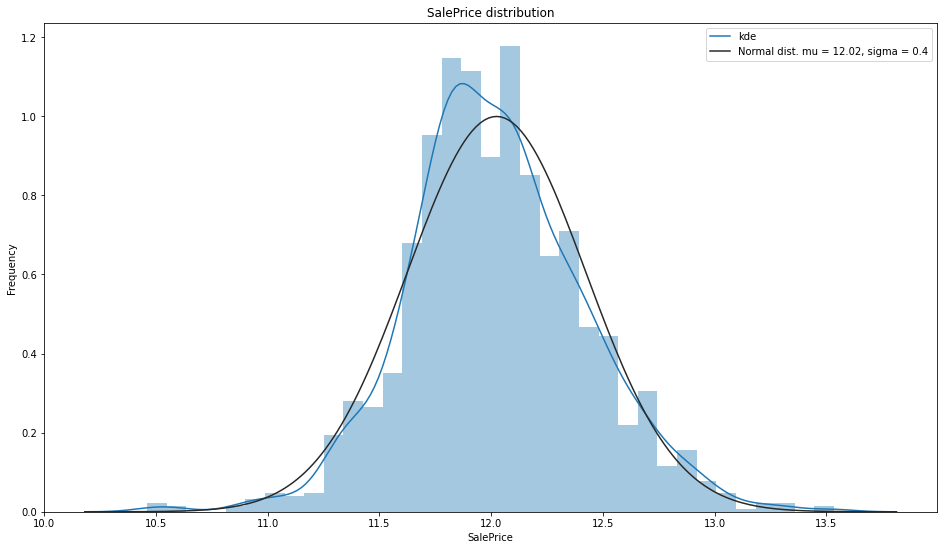

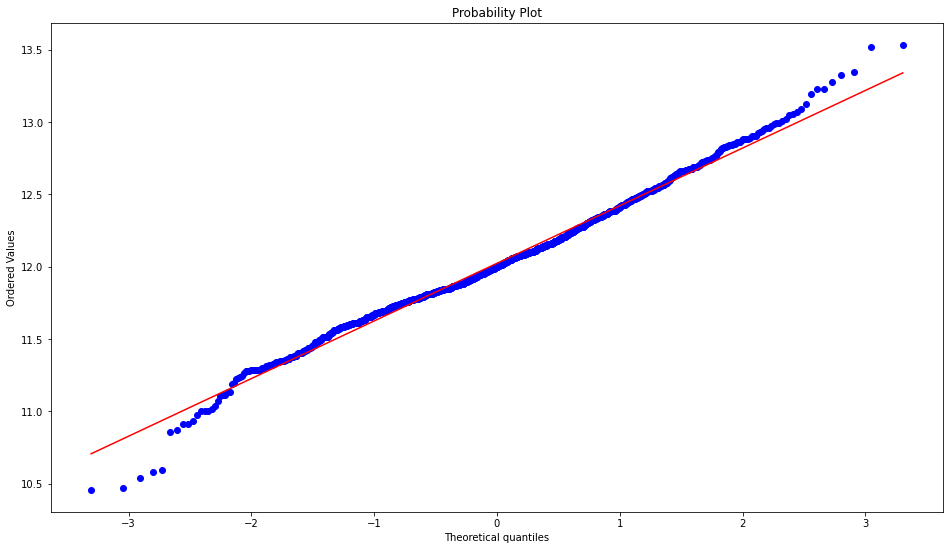

time: 459 ms (started: 2022-08-09 01:09:10 +03:00)


In [11]:
# plot the distribution
plt.figure(figsize=(16,9))
sns.distplot(train['SalePrice'] , fit=norm, kde=True);

# Get the fitted parameters

(mu, sigma) = norm.fit(train['SalePrice'])
print(f'mu = {mu}, sigma = {sigma}')

plt.legend(['kde', f'Normal dist. mu = {round(mu, 2)}, sigma = {round(sigma, 2)}'],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

# plot the QQ-plot
fig = plt.figure(figsize=(16,9))
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [12]:
corrmat = train.corr()

time: 8.54 ms (started: 2022-08-09 01:09:10 +03:00)


In [13]:
corrmat

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.073959
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.355879
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.257320
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.817185
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.036868
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.586570
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.565608
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.430809
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.372023
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,0.004832


time: 29.5 ms (started: 2022-08-09 01:09:10 +03:00)


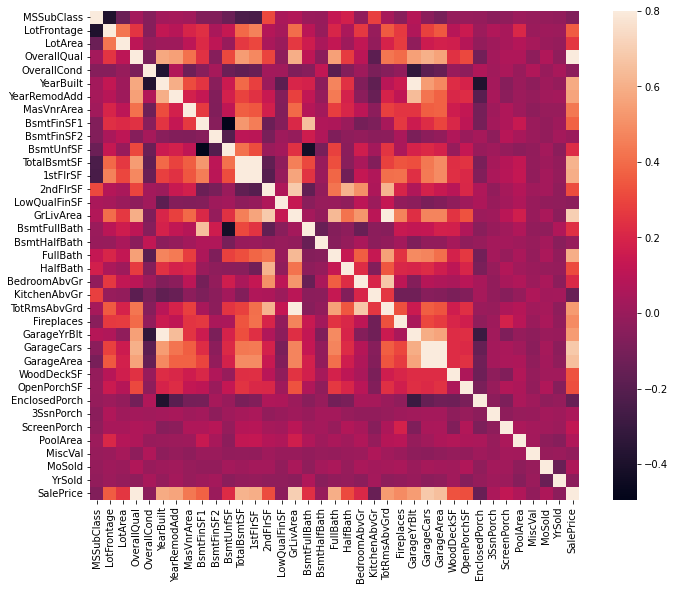

time: 637 ms (started: 2022-08-09 01:09:10 +03:00)


In [14]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [15]:
cols = corrmat.nlargest(10, 'SalePrice').index

time: 2.08 ms (started: 2022-08-09 01:09:11 +03:00)


In [16]:
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd'],
      dtype='object')

time: 3.1 ms (started: 2022-08-09 01:09:11 +03:00)


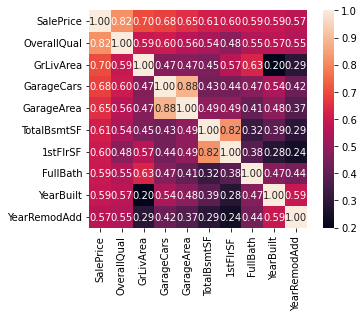

time: 487 ms (started: 2022-08-09 01:09:11 +03:00)


In [17]:
hm = sns.heatmap(train[cols].corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

/home/roman/my_env/lib/python3.8/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


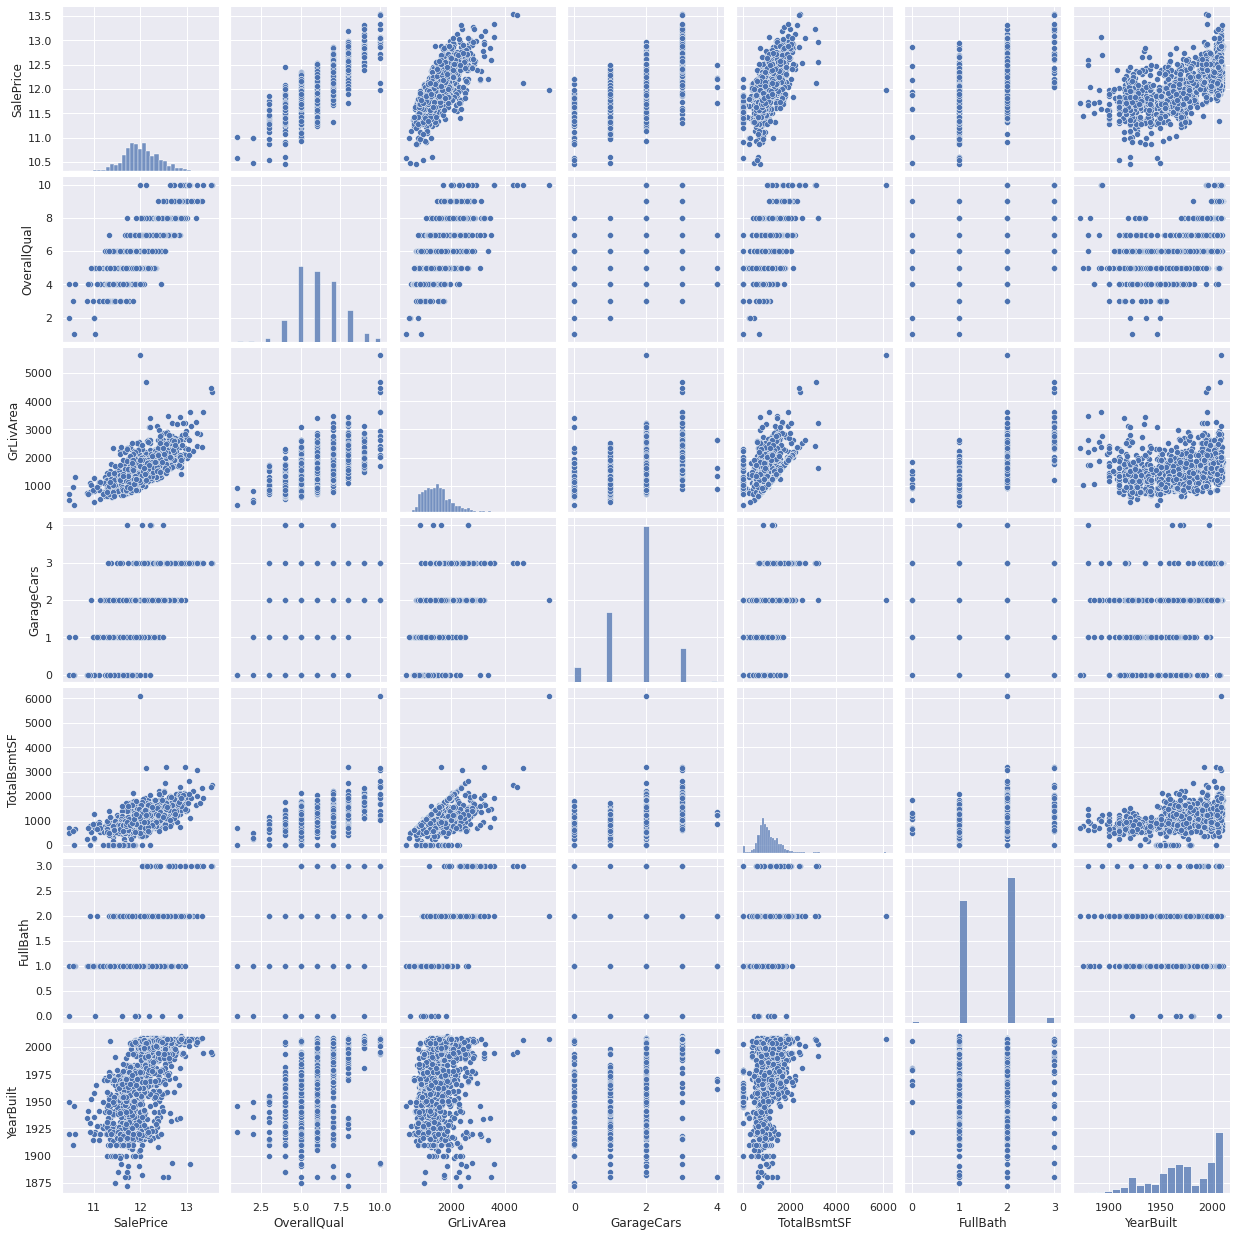

time: 6.2 s (started: 2022-08-09 01:09:12 +03:00)


In [18]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();

# Missing values

In [19]:
(train.isna().mean())[train.isna().mean() != 0].sort_values(ascending=False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

time: 17.6 ms (started: 2022-08-09 01:09:18 +03:00)


In [20]:
train.groupby('PoolQC', dropna=False)['SalePrice'].agg(['count', 'mean'])

,count,mean
PoolQC,,
Ex,2,12.944243
Fa,2,12.267739
Gd,3,12.185594
NaN,1453,12.022122


time: 7.08 ms (started: 2022-08-09 01:09:18 +03:00)


In [21]:
train.groupby('MiscFeature', dropna=False)['SalePrice'].agg(['count', 'mean'])

,count,mean
MiscFeature,,
Gar2,2,12.041566
Othr,2,11.356609
Shed,49,11.868394
TenC,1,12.429220
NaN,1406,12.030119


time: 5.7 ms (started: 2022-08-09 01:09:18 +03:00)


In [22]:
train.groupby('Alley', dropna=False)['SalePrice'].agg(['count', 'mean'])

,count,mean
Alley,,
Grvl,50,11.673363
Pave,41,11.996819
NaN,1369,12.037682


time: 5.34 ms (started: 2022-08-09 01:09:18 +03:00)


In [23]:
train.groupby('Fence', dropna=False)['SalePrice'].agg(['count', 'mean'])

,count,mean
Fence,,
GdPrv,59,12.057119
GdWo,54,11.784241
MnPrv,157,11.850604
MnWw,11,11.796808
NaN,1179,12.058605


time: 6.1 ms (started: 2022-08-09 01:09:18 +03:00)


In [24]:
train.groupby('FireplaceQu', dropna=False)['SalePrice'].agg(['count', 'mean'])

,count,mean
FireplaceQu,,
Ex,24,12.670022
Fa,33,12.008516
Gd,380,12.256538
Po,20,11.738825
TA,313,12.186421
NaN,690,11.808915


time: 6.48 ms (started: 2022-08-09 01:09:18 +03:00)


In [25]:
na_cols_to_drop = (train.isna().mean())[train.isna().mean() > 0.2].sort_values(ascending=False).index.tolist()

time: 21.6 ms (started: 2022-08-09 01:09:18 +03:00)


In [26]:
na_cols_to_drop

['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']

time: 2.04 ms (started: 2022-08-09 01:09:18 +03:00)


In [27]:
train.drop(na_cols_to_drop, axis=1, inplace=True)
test.drop(na_cols_to_drop, axis=1, inplace=True)

time: 2.94 ms (started: 2022-08-09 01:09:18 +03:00)


In [28]:
(train.isna().mean())[train.isna().mean() != 0].sort_values(ascending=False)

LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrType      0.005479
MasVnrArea      0.005479
Electrical      0.000685
dtype: float64

time: 18.1 ms (started: 2022-08-09 01:09:18 +03:00)


# Missing values

LotFrontage: Linear feet of street connected to property

Neighborhood: Physical locations within Ames city limits

 Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.

In [29]:
train[['Neighborhood', 'LotFrontage']].sort_values(by='Neighborhood').head(50)

,Neighborhood,LotFrontage
851,Blmngtn,NaN
465,Blmngtn,NaN
790,Blmngtn,43.0
1019,Blmngtn,43.0
639,Blmngtn,53.0
1126,Blmngtn,53.0
597,Blmngtn,53.0
219,Blmngtn,43.0
1004,Blmngtn,43.0
982,Blmngtn,43.0


time: 10.1 ms (started: 2022-08-09 01:10:33 +03:00)


In [30]:
nan_LotFrontage_dict = train.groupby("Neighborhood")["LotFrontage"].agg(['mean']).to_dict()['mean']

time: 3 ms (started: 2022-08-09 01:10:34 +03:00)


In [31]:
nan_LotFrontage_dict

{'Blmngtn': 47.142857142857146,
 'Blueste': 24.0,
 'BrDale': 21.5625,
 'BrkSide': 57.509803921568626,
 'ClearCr': 83.46153846153847,
 'CollgCr': 71.68253968253968,
 'Crawfor': 71.8048780487805,
 'Edwards': 68.21739130434783,
 'Gilbert': 79.87755102040816,
 'IDOTRR': 62.5,
 'MeadowV': 27.8,
 'Mitchel': 70.08333333333333,
 'NAmes': 76.46236559139786,
 'NPkVill': 32.285714285714285,
 'NWAmes': 81.28888888888889,
 'NoRidge': 91.87878787878788,
 'NridgHt': 81.88157894736842,
 'OldTown': 62.788990825688074,
 'SWISU': 58.91304347826087,
 'Sawyer': 74.4375,
 'SawyerW': 71.5,
 'Somerst': 64.66666666666667,
 'StoneBr': 62.7,
 'Timber': 80.13333333333334,
 'Veenker': 59.714285714285715}

time: 3.04 ms (started: 2022-08-09 01:10:35 +03:00)


### Note: We must fill NANs in the test set using only the information from the training set.

In [32]:
aaa = train['LotFrontage']
aaa.index = train['Neighborhood']
aaa.fillna(nan_LotFrontage_dict, inplace=True)

train["LotFrontage"] = aaa.values

time: 2.04 ms (started: 2022-08-09 01:10:36 +03:00)


In [33]:
bbb = test['LotFrontage']
bbb.index = test['Neighborhood']
bbb.fillna(nan_LotFrontage_dict, inplace=True)

test["LotFrontage"] = bbb.values

time: 3.12 ms (started: 2022-08-09 01:10:37 +03:00)


In [34]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    train[col] = train[col].fillna('None')

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    train[col] = train[col].fillna(0)


for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    train[col] = train[col].fillna(0)

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train[col] = train[col].fillna('None')

train["MasVnrType"] = train["MasVnrType"].fillna("None")
train["MasVnrArea"] = train["MasVnrArea"].fillna(0)

train['MSZoning'] = train['MSZoning'].fillna(train['MSZoning'].mode()[0])

train["Functional"] = train["Functional"].fillna("Typ")

train['Exterior1st'] = train['Exterior1st'].fillna(train['Exterior1st'].mode()[0])
train['Exterior2nd'] = train['Exterior2nd'].fillna(train['Exterior2nd'].mode()[0])
train['SaleType'] = train['SaleType'].fillna(train['SaleType'].mode()[0])
train['MSSubClass'] = train['MSSubClass'].fillna("None")
train = train.drop(['Utilities'], axis=1)
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])

train['KitchenQual'] = train['KitchenQual'].fillna(train['KitchenQual'].mode()[0])

time: 23.3 ms (started: 2022-08-09 01:10:37 +03:00)


In [35]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    test[col] = test[col].fillna('None')

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    test[col] = test[col].fillna(0)


for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    test[col] = test[col].fillna(0)

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    test[col] = test[col].fillna('None')

test["MasVnrType"] = test["MasVnrType"].fillna("None")
test["MasVnrArea"] = test["MasVnrArea"].fillna(0)

test['MSZoning'] = test['MSZoning'].fillna(train['MSZoning'].mode()[0])

test["Functional"] = test["Functional"].fillna("Typ")

test['Exterior1st'] = test['Exterior1st'].fillna(train['Exterior1st'].mode()[0])
test['Exterior2nd'] = test['Exterior2nd'].fillna(train['Exterior2nd'].mode()[0])
test['SaleType'] = test['SaleType'].fillna(train['SaleType'].mode()[0])
test['MSSubClass'] = test['MSSubClass'].fillna("None")
test = test.drop(['Utilities'], axis=1)
test['Electrical'] = test['Electrical'].fillna(train['Electrical'].mode()[0])

test['KitchenQual'] = test['KitchenQual'].fillna(train['KitchenQual'].mode()[0])

time: 19 ms (started: 2022-08-09 01:10:38 +03:00)


In [36]:
test.isna().sum().sum()

0

time: 23 ms (started: 2022-08-09 01:10:38 +03:00)


In [37]:
#MSSubClass=The building class
train['MSSubClass'] = train['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
train['OverallCond'] = train['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
train['YrSold'] = train['YrSold'].astype(str)
train['MoSold'] = train['MoSold'].astype(str)

time: 5.98 ms (started: 2022-08-09 01:10:39 +03:00)


In [38]:
#MSSubClass=The building class
test['MSSubClass'] = test['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
test['OverallCond'] = test['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
test['YrSold'] = test['YrSold'].astype(str)
test['MoSold'] = test['MoSold'].astype(str)

time: 7.44 ms (started: 2022-08-09 01:10:40 +03:00)


In [39]:
obj_col = train.columns[(train.dtypes == 'object')].tolist()

time: 1.78 ms (started: 2022-08-09 01:10:40 +03:00)


In [40]:
obj_col

['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

time: 10.2 ms (started: 2022-08-09 01:10:40 +03:00)


In [41]:
train.groupby('MSSubClass')['SalePrice'].agg(['count', 'mean'])

,count,mean
MSSubClass,,
120,87,12.171560
160,63,11.807198
180,10,11.501760
190,30,11.734861
20,536,12.052794
30,69,11.433820
40,4,11.870430
45,12,11.579043
50,144,11.814544


time: 6.77 ms (started: 2022-08-09 01:10:42 +03:00)


<AxesSubplot:xlabel='MSSubClass'>

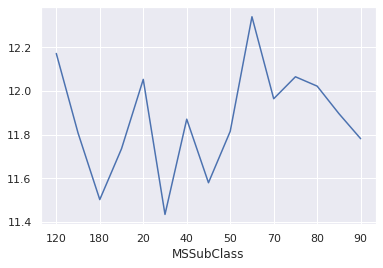

time: 200 ms (started: 2022-08-09 01:10:42 +03:00)


In [42]:
train.groupby('MSSubClass')['SalePrice'].mean().plot()

In [43]:
train.groupby('MSZoning')['SalePrice'].agg(['count', 'mean'])

,count,mean
MSZoning,,
C (all),10,11.118275
FV,65,12.246621
RH,16,11.749848
RL,1151,12.085891
RM,218,11.692901


time: 6.55 ms (started: 2022-08-09 01:10:43 +03:00)


<AxesSubplot:xlabel='MSZoning'>

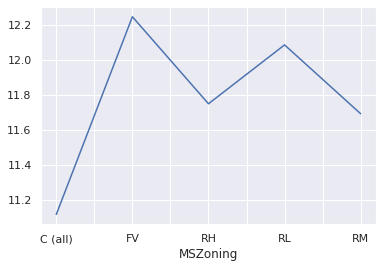

time: 145 ms (started: 2022-08-09 01:10:44 +03:00)


In [44]:
train.groupby('MSZoning')['SalePrice'].mean().plot()

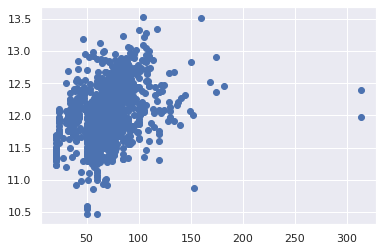

time: 180 ms (started: 2022-08-09 01:10:45 +03:00)


In [45]:
plt.scatter(train['LotFrontage'], train['SalePrice'])

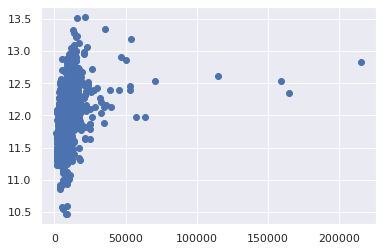

time: 198 ms (started: 2022-08-09 01:10:46 +03:00)


In [46]:
plt.scatter(train['LotArea'], train['SalePrice'])

In [47]:
train.groupby('YearBuilt')['SalePrice'].agg(['count', 'mean'])

,count,mean
YearBuilt,,
1872,1,11.711785
1875,1,11.451061
1880,4,12.122039
1882,1,12.031725
1885,2,11.614405
...,...,...
2006,67,12.387846
2007,49,12.412179
2008,23,12.709929


time: 8.06 ms (started: 2022-08-09 01:10:47 +03:00)


<AxesSubplot:xlabel='YearBuilt'>

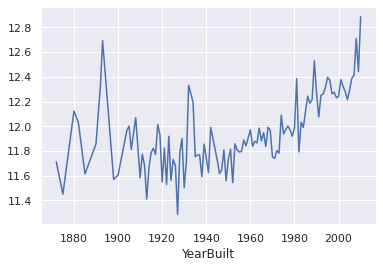

time: 171 ms (started: 2022-08-09 01:10:48 +03:00)


In [48]:
train.groupby('YearBuilt')['SalePrice'].mean().plot()

In [49]:
train.groupby('Street')['SalePrice'].agg(['count', 'mean'])

,count,mean
Street,,
Grvl,6,11.667444
Pave,1454,12.025529


time: 17.5 ms (started: 2022-08-09 01:10:48 +03:00)


In [50]:
train.groupby('LotShape')['SalePrice'].agg(['count', 'mean'])

,count,mean
LotShape,,
IR1,484,12.163471
IR2,41,12.318455
IR3,10,12.205419
Reg,925,11.936101


time: 6.04 ms (started: 2022-08-09 01:10:50 +03:00)


<AxesSubplot:xlabel='LotShape'>

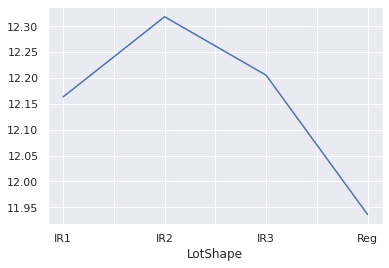

time: 141 ms (started: 2022-08-09 01:10:50 +03:00)


In [51]:
train.groupby('LotShape')['SalePrice'].mean().plot()

In [52]:
train.groupby('LandContour')['SalePrice'].agg(['count', 'mean'])

,count,mean
LandContour,,
Bnk,63,11.810748
HLS,50,12.259262
Low,36,12.120092
Lvl,1311,12.022700


time: 6.15 ms (started: 2022-08-09 01:10:50 +03:00)


<AxesSubplot:xlabel='LandContour'>

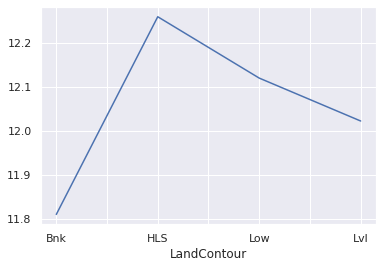

time: 283 ms (started: 2022-08-09 01:10:50 +03:00)


In [53]:
train.groupby('LandContour')['SalePrice'].mean().plot()

# One Hot Encoding

In [54]:
obj_col

['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

time: 1.75 ms (started: 2022-08-09 01:10:51 +03:00)


In [55]:
y_trn = train[['SalePrice']]

time: 2.59 ms (started: 2022-08-09 01:10:51 +03:00)


In [56]:
y_trn

,SalePrice
0,12.247699
1,12.109016
2,12.317171
3,11.849405
4,12.429220
...,...
1455,12.072547
1456,12.254868
1457,12.493133
1458,11.864469


time: 7.73 ms (started: 2022-08-09 01:10:52 +03:00)


In [57]:
X_trn = train.drop('SalePrice', axis=1)

time: 5.5 ms (started: 2022-08-09 01:10:52 +03:00)


# OHE for categorical features

In [58]:
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_trn[obj_col]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(test[obj_col]))

OH_cols_train.index = X_trn.index
OH_cols_test.index = test.index

time: 56.6 ms (started: 2022-08-09 01:10:53 +03:00)


# Scaling numerical features

In [211]:
num_X_train = X_trn.drop(obj_col, axis=1)
num_X_test = test.drop(obj_col, axis=1)

time: 2.61 ms (started: 2022-08-09 03:18:47 +03:00)


In [212]:
(num_X_train < 0).sum()

LotFrontage      0
LotArea          0
OverallQual      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
dtype: int64

time: 12.3 ms (started: 2022-08-09 03:18:48 +03:00)


In [213]:
(num_X_test < 0).sum()

LotFrontage      0
LotArea          0
OverallQual      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
dtype: int64

time: 5.36 ms (started: 2022-08-09 03:18:48 +03:00)


In [214]:
(num_X_train[col] < 0).sum()

0

time: 2.73 ms (started: 2022-08-09 03:18:52 +03:00)


In [220]:
# scaler = MinMaxScaler(feature_range=(0, 1))
# num_X_train_scaled = pd.DataFrame(scaler.fit_transform(num_X_train))
# num_X_test_scaled = pd.DataFrame(scaler.transform(num_X_test))

scaler = RobustScaler()
num_X_train_scaled = pd.DataFrame(scaler.fit_transform(num_X_train))
num_X_test_scaled = pd.DataFrame(scaler.transform(num_X_test))

num_X_train_scaled.index = num_X_train.index
num_X_test_scaled.index = num_X_test.index

time: 13.4 ms (started: 2022-08-09 03:19:44 +03:00)


In [221]:
num_X_train_scaled

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-0.258326,-0.267287,0.489216,0.729199,0.308465,1.016929,0.166931,0.000000,-0.721075,-0.277771,...,0.608939,0.000000,0.274515,0.000000,0.209027,0.000000,0.0,0.0,0.0,0.000000
1,0.477028,0.029699,0.000000,0.062896,-0.473663,0.000000,0.266146,0.000000,-0.372587,0.526851,...,-0.023209,0.000000,-0.082100,1.088306,-0.765097,0.000000,0.0,0.0,0.0,0.000000
2,-0.104641,0.400494,0.489216,0.673046,0.271417,0.998649,0.062022,0.000000,-0.075530,-0.145249,...,0.561720,0.000000,0.511422,0.000000,0.120752,0.000000,0.0,0.0,0.0,0.000000
3,-0.522972,0.017521,0.489216,-0.889124,-0.597296,0.000000,-0.136957,0.000000,0.102426,-0.490151,...,0.491009,1.124166,0.643697,0.000000,0.078025,0.704006,0.0,0.0,0.0,0.000000
4,0.660586,0.958178,0.960326,0.645411,0.199481,1.067712,0.145136,0.000000,0.021029,0.302992,...,0.538134,1.124166,1.375435,1.020908,0.285442,0.000000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.415776,-0.418484,0.000000,0.618066,0.199481,0.000000,-0.830482,0.000000,0.660827,-0.077859,...,0.514564,0.000000,-0.082100,0.000000,0.109290,0.000000,0.0,0.0,0.0,0.000000
1456,0.705753,0.771577,0.000000,0.105962,-0.177090,0.967250,0.200320,0.656944,0.178419,1.041931,...,0.023224,0.000000,0.081458,1.111992,-0.765097,0.000000,0.0,0.0,0.0,0.000000
1457,-0.206692,-0.109826,0.489216,-0.558529,0.424104,0.000000,-0.081551,0.000000,0.569493,0.316548,...,-0.825636,-1.000000,-0.984718,0.000000,0.205096,0.000000,0.0,0.0,0.0,0.233456
1458,-0.104641,0.057955,-0.510784,-0.420427,0.063876,0.000000,-0.416373,0.657207,-1.625775,0.172131,...,-0.621128,-1.000000,-1.040360,1.119068,-0.765097,0.703395,0.0,0.0,0.0,0.000000


time: 19.1 ms (started: 2022-08-09 03:19:45 +03:00)


In [222]:
X_train_res = pd.concat([num_X_train_scaled, OH_cols_train], axis=1)
X_test_res = pd.concat([num_X_test_scaled, OH_cols_test], axis=1)

time: 5.4 ms (started: 2022-08-09 03:19:49 +03:00)


In [224]:
X_train_res.columns = range(0, X_train_res.shape[1])
X_test_res.columns = range(0, X_test_res.shape[1])

time: 1.21 ms (started: 2022-08-09 03:20:04 +03:00)


In [225]:
X_test_res

,0,1,2,3,4,5,6,7,8,9,...,304,305,306,307,308,309,310,311,312,313
0,0.477028,0.476774,-0.510784,-0.232302,-0.756921,0.000000,0.051912,0.656886,-0.404187,-0.223633,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.523362,0.959336,0.000000,-0.285843,-0.804011,0.956898,0.247978,0.000000,-0.126281,0.652598,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.192395,0.885927,-0.510784,0.564235,0.130336,0.000000,0.200700,0.000000,-0.762555,-0.128855,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.383437,0.119818,0.000000,0.591009,0.130336,0.736038,0.121055,0.000000,-0.286577,-0.132950,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-1.522060,-1.474072,0.960326,0.434538,-0.061391,0.000000,-0.092023,0.000000,0.734797,0.560801,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-3.197906,-3.613199,-1.047973,-0.060909,-0.597296,0.000000,-0.830482,0.000000,0.111921,-0.962196,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1455,-3.197906,-3.661851,-1.047973,-0.060909,-0.597296,0.000000,-0.101949,0.000000,-0.350515,-0.962196,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1456,3.527350,1.760967,-0.510784,-0.250341,0.063876,0.000000,0.338897,0.000000,-1.625775,0.454761,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1457,-0.415776,0.225799,-0.510784,0.434538,-0.061391,0.000000,-0.032442,0.000000,0.157058,-0.161680,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


time: 26.9 ms (started: 2022-08-09 03:20:05 +03:00)


In [226]:
X_train_res

,0,1,2,3,4,5,6,7,8,9,...,304,305,306,307,308,309,310,311,312,313
0,-0.258326,-0.267287,0.489216,0.729199,0.308465,1.016929,0.166931,0.000000,-0.721075,-0.277771,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.477028,0.029699,0.000000,0.062896,-0.473663,0.000000,0.266146,0.000000,-0.372587,0.526851,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.104641,0.400494,0.489216,0.673046,0.271417,0.998649,0.062022,0.000000,-0.075530,-0.145249,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.522972,0.017521,0.489216,-0.889124,-0.597296,0.000000,-0.136957,0.000000,0.102426,-0.490151,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.660586,0.958178,0.960326,0.645411,0.199481,1.067712,0.145136,0.000000,0.021029,0.302992,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.415776,-0.418484,0.000000,0.618066,0.199481,0.000000,-0.830482,0.000000,0.660827,-0.077859,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,0.705753,0.771577,0.000000,0.105962,-0.177090,0.967250,0.200320,0.656944,0.178419,1.041931,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,-0.206692,-0.109826,0.489216,-0.558529,0.424104,0.000000,-0.081551,0.000000,0.569493,0.316548,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,-0.104641,0.057955,-0.510784,-0.420427,0.063876,0.000000,-0.416373,0.657207,-1.625775,0.172131,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


time: 21.2 ms (started: 2022-08-09 03:20:08 +03:00)


In [227]:
n_folds = 5

def get_rmse_cv(model, X, y):
    cv = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X.values)
    rmse= np.sqrt(-cross_val_score(model, X.values, y, scoring="neg_mean_squared_error", cv = cv))
    return(rmse)

time: 3.17 ms (started: 2022-08-09 03:20:10 +03:00)


# LinearRegression() and Lasso() as baseline

In [228]:
np.mean(get_rmse_cv(LinearRegression(), X_train_res, y_trn))

363993457.21093035

time: 571 ms (started: 2022-08-09 03:20:11 +03:00)


In [229]:
np.mean(get_rmse_cv(Lasso(alpha =0.05, random_state=1), X_train_res, y_trn))


0.1927119661060687

time: 198 ms (started: 2022-08-09 03:20:11 +03:00)


In [230]:
np.mean(get_rmse_cv(Lasso(alpha =0.005, random_state=1), X_train_res, y_trn))


0.14540712272592157

time: 118 ms (started: 2022-08-09 03:20:13 +03:00)


In [231]:
np.mean(get_rmse_cv(Lasso(alpha =0.0005, random_state=1), X_train_res, y_trn))


0.12437332715428014

time: 432 ms (started: 2022-08-09 03:20:15 +03:00)


In [232]:
np.mean(get_rmse_cv(Lasso(alpha =0.0001, random_state=1), X_train_res, y_trn))


/home/roman/my_env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.468e-02, tolerance: 1.800e-02
  model = cd_fast.enet_coordinate_descent(


0.1299160572282257

time: 1.24 s (started: 2022-08-09 03:20:20 +03:00)


# Feature selection

In [151]:
# X_train, X_val, y_train, y_val = train_test_split(X_train_res, y_trn, random_state=0)

# model_all = xgb.XGBRegressor(max_depth=6, 
#                              n_estimators=100,
#                              learning_rate=0.05,
#                              tree_method='gpu_hist')


# model_all.fit(X_train, y_train)

# result = permutation_importance(model_all, X_val, y_val, n_repeats=10, random_state=42)
# perm_sorted_idx = result.importances_mean.argsort()

# res_df = pd.DataFrame(result.importances_mean, index=X_val.columns).sort_values(by=0, ascending=False)
# res_df.columns = ['Importance']

# best_cols = res_df[res_df['Importance'] > 0.0001].index.tolist()

# best_cols

time: 452 µs (started: 2022-08-09 02:55:24 +03:00)


In [241]:
xgb_model = xgb.XGBRegressor(tree_method='gpu_hist')
params = {'n_estimators':[100, 500, 1000, 2000, 3000], 
          'learning_rate':[0.1, 0.05, 0.01],
          'max_depth':[2, 4, 6],
          'colsample_bytree': [0.2, 0.4, 0.6],
          'min_child_weight': [1, 3, 5],
          'gamma': [0.02, 0.04, 0.06],
          'subsample': [0.4, 0.6, 0.8],
          'objective':['reg:pseudohubererror', 'reg:squarederror']
         }
xgb_grid = GridSearchCV(estimator=xgb_model, param_grid=params, cv=3, verbose=2)

time: 1.28 ms (started: 2022-08-09 03:30:32 +03:00)


In [255]:
xgb_grid.fit(X_train_res, y_trn)

Fitting 3 folds for each of 5832 candidates, totalling 17496 fits
[CV] END colsample_bytree=0.2, gamma=0.02, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=100, objective=reg:pseudohubererror, subsample=0.4; total time=   0.1s


/home/roman/my_env/lib/python3.8/site-packages/xgboost/data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/roman/my_env/lib/python3.8/site-packages/xgboost/data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV] END colsample_bytree=0.2, gamma=0.02, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=100, objective=reg:pseudohubererror, subsample=0.4; total time=   0.1s
[CV] END colsample_bytree=0.2, gamma=0.02, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=100, objective=reg:pseudohubererror, subsample=0.4; total time=   0.1s
[CV] END colsample_bytree=0.2, gamma=0.02, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=100, objective=reg:pseudohubererror, subsample=0.6; total time=   0.1s


/home/roman/my_env/lib/python3.8/site-packages/xgboost/data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/roman/my_env/lib/python3.8/site-packages/xgboost/data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/roman/my_env/lib/python3.8/site-packages/xgboost/data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV] END colsample_bytree=0.2, gamma=0.02, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=100, objective=reg:pseudohubererror, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.2, gamma=0.02, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=100, objective=reg:pseudohubererror, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.2, gamma=0.02, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=100, objective=reg:pseudohubererror, subsample=0.8; total time=   0.1s


/home/roman/my_env/lib/python3.8/site-packages/xgboost/data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/roman/my_env/lib/python3.8/site-packages/xgboost/data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/roman/my_env/lib/python3.8/site-packages/xgboost/data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV] END colsample_bytree=0.2, gamma=0.02, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=100, objective=reg:pseudohubererror, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.2, gamma=0.02, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=100, objective=reg:pseudohubererror, subsample=0.8; total time=   0.1s


/home/roman/my_env/lib/python3.8/site-packages/xgboost/data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/roman/my_env/lib/python3.8/site-packages/xgboost/data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV] END colsample_bytree=0.2, gamma=0.02, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.4; total time=   0.2s
[CV] END colsample_bytree=0.2, gamma=0.02, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.4; total time=   0.2s


/home/roman/my_env/lib/python3.8/site-packages/xgboost/data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/roman/my_env/lib/python3.8/site-packages/xgboost/data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV] END colsample_bytree=0.2, gamma=0.02, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.4; total time=   0.2s
[CV] END colsample_bytree=0.2, gamma=0.02, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.6; total time=   0.2s


/home/roman/my_env/lib/python3.8/site-packages/xgboost/data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/roman/my_env/lib/python3.8/site-packages/xgboost/data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV] END colsample_bytree=0.2, gamma=0.02, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.2, gamma=0.02, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.6; total time=   0.2s


/home/roman/my_env/lib/python3.8/site-packages/xgboost/data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/roman/my_env/lib/python3.8/site-packages/xgboost/data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV] END colsample_bytree=0.2, gamma=0.02, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.2, gamma=0.02, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.8; total time=   0.2s


/home/roman/my_env/lib/python3.8/site-packages/xgboost/data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/roman/my_env/lib/python3.8/site-packages/xgboost/data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV] END colsample_bytree=0.2, gamma=0.02, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=100, objective=reg:squarederror, subsample=0.8; total time=   0.2s


/home/roman/my_env/lib/python3.8/site-packages/xgboost/data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV] END colsample_bytree=0.2, gamma=0.02, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=500, objective=reg:pseudohubererror, subsample=0.4; total time=   0.4s


/home/roman/my_env/lib/python3.8/site-packages/xgboost/data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV] END colsample_bytree=0.2, gamma=0.02, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=500, objective=reg:pseudohubererror, subsample=0.4; total time=   0.4s


/home/roman/my_env/lib/python3.8/site-packages/xgboost/data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV] END colsample_bytree=0.2, gamma=0.02, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=500, objective=reg:pseudohubererror, subsample=0.4; total time=   0.4s


/home/roman/my_env/lib/python3.8/site-packages/xgboost/data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV] END colsample_bytree=0.2, gamma=0.02, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=500, objective=reg:pseudohubererror, subsample=0.6; total time=   0.4s


/home/roman/my_env/lib/python3.8/site-packages/xgboost/data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV] END colsample_bytree=0.2, gamma=0.02, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=500, objective=reg:pseudohubererror, subsample=0.6; total time=   0.4s


/home/roman/my_env/lib/python3.8/site-packages/xgboost/data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV] END colsample_bytree=0.2, gamma=0.02, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=500, objective=reg:pseudohubererror, subsample=0.6; total time=   0.4s


/home/roman/my_env/lib/python3.8/site-packages/xgboost/data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV] END colsample_bytree=0.2, gamma=0.02, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=500, objective=reg:pseudohubererror, subsample=0.8; total time=   0.4s


/home/roman/my_env/lib/python3.8/site-packages/xgboost/data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV] END colsample_bytree=0.2, gamma=0.02, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=500, objective=reg:pseudohubererror, subsample=0.8; total time=   0.4s


/home/roman/my_env/lib/python3.8/site-packages/xgboost/data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV] END colsample_bytree=0.2, gamma=0.02, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=500, objective=reg:pseudohubererror, subsample=0.8; total time=   0.4s


/home/roman/my_env/lib/python3.8/site-packages/xgboost/data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV] END colsample_bytree=0.2, gamma=0.02, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.4; total time=   0.7s


/home/roman/my_env/lib/python3.8/site-packages/xgboost/data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV] END colsample_bytree=0.2, gamma=0.02, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.4; total time=   0.7s


/home/roman/my_env/lib/python3.8/site-packages/xgboost/data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV] END colsample_bytree=0.2, gamma=0.02, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.4; total time=   0.7s


/home/roman/my_env/lib/python3.8/site-packages/xgboost/data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV] END colsample_bytree=0.2, gamma=0.02, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.6; total time=   0.7s


/home/roman/my_env/lib/python3.8/site-packages/xgboost/data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV] END colsample_bytree=0.2, gamma=0.02, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.6; total time=   0.7s


/home/roman/my_env/lib/python3.8/site-packages/xgboost/data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV] END colsample_bytree=0.2, gamma=0.02, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.6; total time=   0.7s


/home/roman/my_env/lib/python3.8/site-packages/xgboost/data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV] END colsample_bytree=0.2, gamma=0.02, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.8; total time=   0.7s


/home/roman/my_env/lib/python3.8/site-packages/xgboost/data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV] END colsample_bytree=0.2, gamma=0.02, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.8; total time=   0.7s


/home/roman/my_env/lib/python3.8/site-packages/xgboost/data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV] END colsample_bytree=0.2, gamma=0.02, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=500, objective=reg:squarederror, subsample=0.8; total time=   0.7s


/home/roman/my_env/lib/python3.8/site-packages/xgboost/data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV] END colsample_bytree=0.2, gamma=0.02, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=1000, objective=reg:pseudohubererror, subsample=0.4; total time=   0.7s


/home/roman/my_env/lib/python3.8/site-packages/xgboost/data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV] END colsample_bytree=0.2, gamma=0.02, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=1000, objective=reg:pseudohubererror, subsample=0.4; total time=   0.7s


/home/roman/my_env/lib/python3.8/site-packages/xgboost/data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV] END colsample_bytree=0.2, gamma=0.02, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=1000, objective=reg:pseudohubererror, subsample=0.4; total time=   0.7s


/home/roman/my_env/lib/python3.8/site-packages/xgboost/data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV] END colsample_bytree=0.2, gamma=0.02, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=1000, objective=reg:pseudohubererror, subsample=0.6; total time=   0.7s


/home/roman/my_env/lib/python3.8/site-packages/xgboost/data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV] END colsample_bytree=0.2, gamma=0.02, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=1000, objective=reg:pseudohubererror, subsample=0.6; total time=   0.8s


/home/roman/my_env/lib/python3.8/site-packages/xgboost/data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV] END colsample_bytree=0.2, gamma=0.02, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=1000, objective=reg:pseudohubererror, subsample=0.6; total time=   0.7s


/home/roman/my_env/lib/python3.8/site-packages/xgboost/data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV] END colsample_bytree=0.2, gamma=0.02, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=1000, objective=reg:pseudohubererror, subsample=0.8; total time=   0.8s


/home/roman/my_env/lib/python3.8/site-packages/xgboost/data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV] END colsample_bytree=0.2, gamma=0.02, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=1000, objective=reg:pseudohubererror, subsample=0.8; total time=   0.8s


/home/roman/my_env/lib/python3.8/site-packages/xgboost/data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV] END colsample_bytree=0.2, gamma=0.02, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=1000, objective=reg:pseudohubererror, subsample=0.8; total time=   0.7s


/home/roman/my_env/lib/python3.8/site-packages/xgboost/data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV] END colsample_bytree=0.2, gamma=0.02, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=1000, objective=reg:squarederror, subsample=0.4; total time=   1.4s


/home/roman/my_env/lib/python3.8/site-packages/xgboost/data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[CV] END colsample_bytree=0.2, gamma=0.02, learning_rate=0.1, max_depth=2, min_child_weight=1, n_estimators=1000, objective=reg:squarederror, subsample=0.4; total time=   1.4s


/home/roman/my_env/lib/python3.8/site-packages/xgboost/data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


KeyboardInterrupt: 

time: 23.2 s (started: 2022-08-09 03:39:12 +03:00)


In [283]:
best_params = {'objective':'reg:squarederror',
                'colsample_bytree': 0.4,
                'gamma': 0.04,
                'learning_rate': 0.05,
                'max_depth': 3,
                'min_child_weight': 2,
                'n_estimators': 2000,
                'subsample': 0.4,
                'tree_method': 'gpu_hist'}

time: 1.04 ms (started: 2022-08-09 03:46:23 +03:00)


In [284]:
model_xgb = xgb.XGBRegressor(**best_params)

time: 477 µs (started: 2022-08-09 03:46:24 +03:00)


In [285]:
np.mean(get_rmse_cv(model_xgb, X_train_res, y_trn))

/home/roman/my_env/lib/python3.8/site-packages/xgboost/data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/roman/my_env/lib/python3.8/site-packages/xgboost/data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/roman/my_env/lib/python3.8/site-packages/xgboost/data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/roman/my_env/lib/python3.8/site-packages/xgboost/data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate

0.12319434406379974

time: 21.1 s (started: 2022-08-09 03:46:27 +03:00)


In [286]:
model_xgb.fit(X_train_res, y_trn)

/home/roman/my_env/lib/python3.8/site-packages/xgboost/data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0.04, gpu_id=0,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=3,
             min_child_weight=2, missing=nan, monotone_constraints='()',
             n_estimators=2000, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.4,
             tree_method='gpu_hist', validate_parameters=1, verbosity=None)

time: 5.49 s (started: 2022-08-09 03:46:49 +03:00)


In [238]:
preds = np.exp(lasso_linreg.predict(X_test_res))

time: 5.57 ms (started: 2022-08-09 03:21:02 +03:00)


In [269]:
preds = np.exp(model_xgb.predict(X_test_res))

time: 37.5 ms (started: 2022-08-09 03:43:26 +03:00)


In [270]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = preds
sub.to_csv('submission.csv',index=False)

time: 8.28 ms (started: 2022-08-09 03:43:28 +03:00)
